# Least Squares Approximation

In [5]:
from math import cos, sin, pi
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def f(n):
    return 1/(1 + n**2)

In [7]:
def getPoints(f, p, r):
    """
    Gets 'order' evenly-spaced points within the given range.
    Runs it through function f to return 2D array with [xi, yi].

    f - function to return [xi, yi] inside 'data' return.
    p - amount of points to retrieve within given function.
    r - range to retrieve points by; (i.e. [-5, 5])

    Returns:
        x - (list) x coordinates of the points.
        y - (list) y coordinates of the points.
        xy - (list(list)) [x,y] coordinates of the points.
    """
    points = np.linspace(r[0], r[1], num = p).tolist()
    x = []
    y = []
    xy = []
    for i in points:
        x.append(i)
        y.append(f(i))
        xy.append([i, f(i)])

    return x, y, xy

In [102]:
def LeastSquares(f, o, r):
    """ Raised Cosine Interpolation

    f - function.
    o - order of interpolation.
    r - range of points.
    
    Returns:
            xyp - [x, y] data points of evenly spaced ponts between 'range'.
            xy - [x, y] data points of the ACTUAL given function (10,000 points).
            xyf - [x, y] data points of function generated with Lagrange.
    """
    def L(u, x, y):
        """ L(x) for Raised Cosine, given a specific x point & finding y from data.
        
        u - unknwon value to find.
        x - x data points of function output.
        y - y data points of function output.
        
        Order is kept in check by logic (x_n, x_n) == (x_len(x), y_len(x))
        
        Return: Estimated y point.
        """
        xa = sum(x)/len(x)
        ya = sum(y)/len(y)
        
        xya = 0
        xsa = 0
        
        for i in range(len(x) or len(y)): xya += (x[i] - xa) * (y[i]-ya)        
        for i in range(len(x)): xsa += (x[i] - xa)**2
        #print(xs)
            
        m = xya / xsa
        
        return ya - m*xa

    # X, Y for points.
    xp, yp, _ = getPoints(f, o, [-5, 5]) # Generated Points
    x, y, _ = getPoints(f, 10000, [-5, 5]) # Actual Function Point
        
    # X, Y for interpolated function.
    xf = []
    yf = []
    for i in range(len(xp) or len(yp)):
        xf.append(xp[i])
        yf.append(L(xp[i], xp, yp))
        
    xyp = [xp, yp]
    xy = [x, y]
    xyf = [xf, yf]
    
    return xy, xyf, xyp

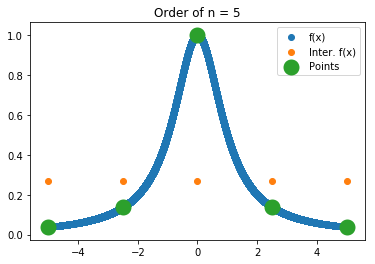

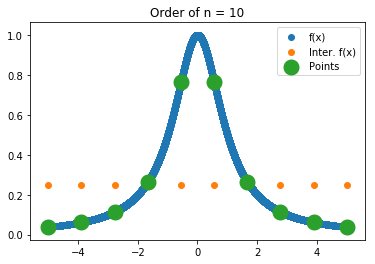

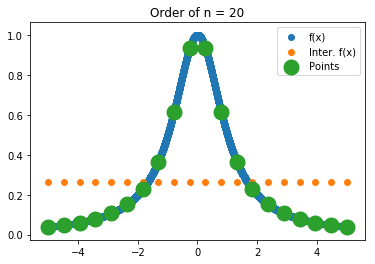

In [103]:
orders = [5, 10, 20]
for o in orders:
    xy, xyf, xyp = LeastSquares(f, o, [-5, 5])
    a = plt.scatter(xy[0], xy[1], linewidth=1) # actual function.
    i = plt.scatter(xyf[0], xyf[1], linewidth=1) # interpolated function.
    p = plt.scatter(xyp[0], xyp[1], linewidth=10) # points.
    plt.title(f'Order of n = {o}')
    plt.legend((a, i, p), ('f(x)', 'Inter. f(x)', 'Points'))
    plt.show()